# Some notes and calculations to support motion-based localization estimates


To run this on Google Colab:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](<https://colab.research.google.com/github/JohnGBaker/GWI-metrics/blob/main/Notebooks/Formulation Calcs.ipynb>)

## Formulation
We are interested in information about the incident direction of an incoming GW wave-train which comes from moving the detector around in the wave field and a rate generally slow compared to the wave frequency.

We start with some general assumptions about the incident gravitational wave signal and its parameterization, 
$$
h(t,m,\theta_I,\theta_E)
=A(\tau(t,\theta_E)/m,\theta_I)\exp\left(i\Phi(\tau(t,\theta_E)/m,\theta_I)\right).
$$
Significantly, we distinguish extrinsic parameters, including the sky position and a few others which are closely coupled. The amplitude $A$ and wavetrain phase $\Phi$ are functions of the scaled retarded time $\tau/m$ (relating the source to the point of observation) and otherwise only intrinsic parameters. Dependence on the (slightly misleadingly named) "intrinsic" parameters is only trough the retarded time function.  Among these we include a parameter $m$, which could be total mass in some cases, that scales the retarded time, and appears nowhere else.  For scaling purposes we assume $m$ is order 1.

### Simplifying assumptions
- Ignore polarization/amplitude dependence. The form of the amplitude expression above is independent of $\theta_E$ already neglects localization effects.  The analysis here is relevant when these are not dominant.
- We also assume that the amplitude and the wave-train frequency $\omega=\partial_\tau \Phi$ are only slowly varying, negligible in comparison with the frequency, concretely that $\partial_\tau \ln A,\partial \tau \ln \omega \ll \omega.$  In merger, or with strong precission this assumption could be challenged, thus this treatment applies when any such effects are not dominant for localization.

### Likelihood
We need some specification of the likelihood function in order to define a Fisher Information matrix from parameter estimation.  We approximate this in terms of a whitened noise signal, expressed continuously in time
$$
\ln L = -\frac12 \rho^2 \approx \int_0^T dt |y(t,m,\theta_E,\theta_I)|^2
$$
where
$$
y(t,m,\theta_E,\theta_I)\approx\frac{A(\tau(t,\theta_E)/m,\theta_I)}{\sigma(\omega(t,m,\theta_I))}\exp\left(i\Phi(\tau(t,\theta_E)/m,\theta_I)\right).
$$
This provides an accurate representation where we can effectively define $\sigma(f(t))$ which is clear for sufficiently chirping cases where $f$ is narrow-band and for sufficiently strongly chirping cases where f is the derivative of the Fourier phase. In the latter case we can formally decompose the waveform in Fourier domain and consider the time-domain amplitude and phase as approximate with $t=t(f)$ and $\omega=f$. In that cases the integrals should formally me in Fourier domain.  For simplicity we will write everything in time domain with the understanding that one should revert to the Fourier versions if there is any subtlety (eg to treat mergers more concretely).  The general logic remains the same.  This form likelihood could be insufficient for slowly chirping cases with sharply varying $\sigma(f)$ or where multiple harmonics at different frequencies are mutually significant.

### Detector motion
We are interested sky-localization capability related to the path of the detector $\gamma(t)$.  We will treat this as a spatial vector, though a special-relativistic treatment would be similar.  Our results should be invariant when changing the coordinate reference point for this path. Concretely if motion is relevant, we will assume that the motion is circular (eg orbiting the Sun), concretely, $\gamma(t)=(\gamma_0^x+R \cos(\Omega t+\lambda_0),\gamma_0^y,R \sin(\Omega t+\lambda_0), \gamma_0^z)$ in $(x,y,z)$ coordinates, with $R= 1$ A.U and $\Omega=2\pi/$yr.

### Retarded time
Under the conditions above, information about the wavefront orientation comes only through the impact of propagation direction and detector motion on the proper time function
$$
\tau(t,\theta_E)=t-t_0(\theta_E)-\gamma(t)\cdot\hat n(\theta_E).
$$
Here $t_0$ is a timing parameter and $\hat n$ is the wave-propagation direction which we are primarily interested to infer.

In equatorial coordinates $\hat n=(\cos(\beta)\cos(\lambda),\cos(\beta)\sin(\lambda),\sin(\beta)$.



### Whitened signal derivatives
Because we have specified that the amplitude and frequency are slowly dependent on time, we will treat these quantities as constant on the light crossing time of the field of motion.  
Thus, suppressing parameter arguments our approximation for the derivatives whitened signal become
$$
\begin{align}
m\frac{\partial}{\partial{m}}y(t)&=-i\omega(t)\tau(t)y(t)\\
\frac{\partial}{\partial{t_0}}y(t)&=-i\omega(t)y(t)\\
\frac{\partial}{\partial{\alpha}}y(t)&=-i\omega(t)\gamma(t)\cdot \frac{\partial \hat n}{\partial \alpha}y(t)\\
&=:-i\omega(t)\gamma_\alpha(t)y(t).
\end{align}
$$
The last lines express the dependence on some sky angle parameter $\alpha$ with $\gamma_\alpha=\gamma\cdot{\partial \hat n}/{\partial \alpha}$ defined for convenience.

Generally we could define our angle parameter $\alpha$ to be any sky direction.  For simplicity, we can take the case of an all ecliptic scenario where $\alpha\equiv\lambda$ and we evaluate at $\lambda=\beta=0$.  In that case $\hat n = (\cos(\lambda),\sin(\lambda),0)$ and $\hat n_{,\alpha}=(0,1,0)$.  Then
$$\gamma_\alpha(t)=\gamma^y(t)=\gamma_0^y+𝑅\sin(\Omega t+\lambda_0)$$
and 
$$\gamma(t)\cdot\hat n=\gamma^x(t)=\gamma_0^x+𝑅\cos(\Omega t+\lambda_0)$$.


### Fisher information matrix elements
The Fisher matrix elements are individually given by
$$
I_{jk}=\int_0^Tdt\left|y(t)\right|^2\omega(t)^2 f_j f_k
$$
where for parameters $(t_0,\ln m,\alpha)$ we have
$$
\begin{array}{}
f&=&\left(1,\tau(t),\gamma_\alpha(t)\right),\\
\tau(t)&=&t-t_0-\gamma_0^x-R\cos(\Omega t+\lambda_0)\\
\gamma_\alpha(t)&=&\gamma_0^y+𝑅\sin(\Omega t+\lambda_0)
\end{array}
$$
As we have noted earlier, the reference point for $\gamma(t)$ is arbitrary. Nonetheless is gives definition to the parameters and all Fisher element except $I_{00}$ depend on the reference point. On the other hand, it can be verified that, the Fisher determinant is independent of $\gamma$-translations and for the covariance matrix $C=I^{-1}$, only the $t_0$ parts, $C_{00}, C_{01}$ and $C_{02}$ depend on $\gamma$-translations.  It is convenient to use this freedom to require that $I_{01}=I_{02}=0$. These depend separately on the independent references for $\gamma\cdot\hat n$ and $\gamma\cdot\hat n_{,\alpha}$. 

With that stipulation the sky-angle variance element is
$$
\sigma_\alpha^2=C_{22}=\frac{I_{11}}{I_{11}I_{22}-I_{12}^2}.
$$


We will use the following notation to help digest the Fisher elements a little more. We substitute $x=t/R+x_0$, for $t$ where $x_0=\lambda/k$ and $k=R\Omega$. We also write $\Delta=T/R$ and $\eta=k\Delta=T\Omega$, and $Z=\rho^2\widehat\omega^2/T$.  Note, that for meaningful observations in millihertz band with AU-scale $R$ it will be generally the case that $\Delta\gg1$.  Also note that generally $\eta$ will be of order 1, but may be somewhat smaller for bursts. 

Finally we will denote the integrals by an overbar as:
$$
\begin{array}{rcl}
\overline f &=& \frac1{ZT}\int_0^Tdt\left|y(t)\right|^2\omega(t)^2 f(t)\\
&=&\frac1{Z\Delta}\int_{x_0}^{x_0+\Delta}dx\left|y(t(x))\right|^2\omega(t(x))^2 f(t(x))
\end{array}
$$
for an arbitrary function $f$.  The definition is
scaled so that $\overline c=c$ for any constant $c$.

Then we can write
$$
\hat I_{jk}=\frac{1}{ZTR^2}I_{jk}=\frac1{R^2}\overline{f_jf_k}.
$$

The conditions $I_{01}=I_{02}=0$ simply become $\overline f_1 =\overline f_2 =0$. With these provisions have:
$$
\begin{array}{rcccl}
f_1(x)/R&=&\tau(t(x))/R&=&x-\overline x-\left(\cos kx-\overline{\cos kx}\right)\\
f_2(x)/R&=&\gamma_\alpha(t(x))/R&=&\sin kx-\overline{\sin kx}\\
\end{array}
$$

We can then write expressions for the (scaled) Fisher elements in a form which is helpful for insight
$$
\begin{array}{rcl}
\hat I_{11}&=&\overline{\left(x-\overline x-\cos kx+\overline{\cos kx}\right)^2}\\
    &=&\overline{x^2}-\overline{x}^2-2\overline{x\cos kx}+2\overline x\,\overline{\cos kx}+\overline{\cos^2 kx}-\overline{\cos kx}^2\\
\hat I_{12}&=&\overline{\left(x-\overline x-\cos kx+\overline{\cos kx}\right)\left(\sin kx -\overline{\sin kx}\right)}\\
&=&\overline{\left(x-\cos kx\right)\left(\sin kx -\overline{\sin kx}\right)}\\
&=&\overline{x\sin kx} -\overline x\,\overline{\sin kx}-\overline {\cos kx\sin kx} +\overline{\cos kx}\,\overline{\sin kx}\\
\hat I_{22}&=&\overline{\left(\sin kx -\overline{\sin kx}\right)^2}\\
&=&\overline{\sin^2 kx} -\overline{\sin kx}^2
\end{array}
$$

We can generally estimate how each of the component integrals scale:
$$
\begin{array}{rcl}
\overline{x}\sim\Delta\\
\overline{x^2}\sim\Delta^2\\
\overline{\cos kx}\sim \eta^{-1}\\
\overline{\sin kx}\sim \eta^{-1}\\
\overline{\cos^2 kx}\sim1\\
\overline{\sin^2 kx}\sim1\\
\overline {\cos kx\sin kx}\sim \eta^{-1}\\
\overline{x\cos kx}\sim\Delta\eta^{-2}(1+\eta)\\
\overline{x\sin kx}\sim\Delta\eta^{-2}(1+\eta).
\end{array}
$$
Keeping terms of leading order in $\Delta$ we have
$$
\begin{array}{rclrl}
\hat I_{11}&\approx&\overline{x^2}-\overline{x}^2&\sim&\Delta^2\\
\hat I_{12}&\approx&\overline{x\sin kx} -\overline x\,\overline{\sin kx}&\sim&\Delta\\
\hat I_{22}&\approx&\overline{\sin^2 kx} -\overline{\sin kx}^2&\sim&1
\end{array}
$$

Then, with this approximation
$$
\begin{array}{rcl}
\sigma_\alpha^2&\approx&\frac{1}{\rho^2\widehat{\omega}^2R^2}\frac1{\hat I_{22}}\left[1-\frac{{\hat I_{12}}^2}{\hat I_{11}\hat I_{22}}\right]^{-1}\\
&\sim&\frac{1}{\rho^2\widehat{\omega}^2R^2}
\end{array}
$$

Some remarks:
1. Everything but the coefficient up front comes to order unity
2. The leading coefficient realizes a version of the astrometric localization formula as expected.
3. The part in brackets, likely depends on details like the relative sky position.  As long as we can be assured that the result is typically of order 1, we can ignore these details. 
3. For the part in brackets, but terms are of the same order and cancelation is possible, in that case we would need to include beyond leading terms for a meaningful result. 

### Continuous wave sources
For CW sources, such as galactic binaries, we approximate the frequency as a constant $\omega(t)=\omega_0$, as is $|y|^2$. Liekwise $\widehat{\omega^2}=\omega_0^2$.

We can explicitly compute each of the component integrals:
$$
\begin{array}{rcl}
\overline{x}&=&x_0+\frac12\Delta\\
\overline{x^2}&=&\frac13\Delta^2+x_0\Delta+x_0^2\\
  %&=&\frac13\Delta^2+{\overline{x}}^2-(x_0+\frac12\Delta)^2+x_0\Delta+x_0^2\\
  %&=&\frac13\Delta^2+{\overline{x}}^2-\frac14\Delta^2\\
  &=&\frac1{12}\Delta^2+{\overline{x}}^2\\
\overline{\cos kx}&=&\frac1\eta\left(\sin(\lambda+\eta)-\sin\lambda\right)\\
  &=:&\Delta_S\\ 
\overline{\sin kx}&=&-\frac1\eta\left(\cos(\lambda+\eta)-\cos\lambda\right)\\
  &=:&-\Delta_C\\  
\overline{\cos^2 kx}&=&\frac12\left(1+\frac1{2\eta}\left[\sin(2\lambda+2\eta)-\sin(2\lambda)\right]\right)\\
  &=:&\frac12\left(1+\Delta_{S2}\right)\\
\overline{\sin^2 kx}&=&\frac12\left(1-\frac1{2\eta}\left[\sin(2\lambda+2\eta)-\sin(2\lambda)\right]\right)\\
  &=&\frac12\left(1-\Delta_{S2}\right)\\
\overline {\cos kx\sin kx}&=&-\frac12\frac1{2\eta}\left[\cos(2\lambda+2\eta)-\cos(2\lambda)\right]\\
  &=:&-\frac12\Delta_{C2}\\
\overline{x\cos kx}&=&\frac\Delta\eta\left(\Delta_C+\left(\frac12\eta+\lambda\right)\Delta_S
+\frac12\left(\sin(\lambda+\eta)+\sin\lambda\right) \right)\\
\overline{x\sin kx}&=&\frac\Delta\eta\left(\Delta_S-\left(\frac12\eta+\lambda\right)\Delta_C-\frac12\left(\cos(\lambda+\eta)+\cos\lambda\right) \right)\\
\end{array}
$$

where we have defined $\Delta_C,\Delta_S,\Delta_{C2},\Delta_{S2}$ as indicated.  Each of these is dependent on the additional parameter $\lambda$, but each or these also vanishes on average over possible values of $\lambda$ or when the observation ($T$) persists for some whole number of orbital cycles $\eta=2n\pi$.

Using our expressions above for the Fisher elements to leading order in $\Delta$ we have
$$
\begin{array}{rcl}
\hat I_{11}&\approx&\frac1{12}\Delta^2\\
\hat I_{12}&\approx&\frac\Delta\eta\left(\Delta_S-\left(\frac12\eta+\lambda\right)\Delta_C-\frac12\left(\cos(\lambda+\eta)+\cos\lambda\right)\right)- \left(\lambda\frac\Delta\eta+\frac12\Delta\right)\left(-\Delta_C\right)\\
  &\approx&\frac\Delta\eta\left(\Delta_S-\frac12\left(\cos(\lambda+\eta)+\cos\lambda\right)\right)\\
\hat I_{22}&\approx&\frac12\left(1-\Delta_{C2}\right) -{\Delta_C}^2
\end{array}
$$

For an integer number of orbital cycles these reduce to
$$
\begin{array}{rcl}
\hat I_{11}&\approx&\frac1{12}\Delta^2\\
\hat I_{12}&\approx&-\frac\Delta\eta\cos\lambda\\
\hat I_{22}&\approx&\frac12
\end{array}
$$
so
$$
\sigma_\alpha^2\approx\frac{2}{\rho^2\widehat{\omega}^2R^2}\left[1-\frac{24}{\eta^2}\cos^2\lambda\right]^{-1}.
$$
Note that, by the assumptions we have already made $\eta>=2\pi>\sqrt{24}$ so the term in brackets cannot yield an unphysical negative value or vanish. The coefficient on this term is about $0.6/n^2$ for $n$ cycles (years) of observation, so that inverse of the part in brackets is always between 1 and 2.6, quickly approaching 1. While I failed to find a simple expression for the mean, we can write the minimum (at $\lambda=0$), maximum (at $\lambda=\pi/2$) and median (at $\lambda=\pi/4$),
$$
\begin{array}{rcl}
\sigma_{\alpha^2,\mathrm{max}}&\approx&\frac{2}{\rho^2\widehat{\omega}^2R^2}\left(1-\frac{24}{\eta^2}\right)^{-1}\\
\sigma_{\alpha^2,\mathrm{med}}&\approx&\frac{2}{\rho^2\widehat{\omega}^2R^2}\left(1-\frac{12}{\eta^2}\right)^{-1}\\
\sigma_{\alpha^2,\mathrm{min}}&\approx&\frac{2}{\rho^2\widehat{\omega}^2R^2}
\end{array}
$$
The range reduces toward the minimum, which is independent of $\lambda$, for large $\eta$, making it an obvious choice for an estimate. Taking the median value over $\eta$ provides a good fit for $T$ down to about one half orbit, as we show below.


In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/JohnGBaker/GWI-metrics.git
    src='GWI-metrics/src/'
else:
    src='../src/'
!mkdir -p '../plots/'

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Integrated CW expressions, we leave off the rho, omega0,R dependence at front, and let Omega=1

DelS=lambda eta,lam:(np.sin(eta+lam)-np.sin(lam))/eta
DelC=lambda eta,lam:(np.cos(eta+lam)-np.cos(lam))/eta
DelC2=lambda eta,lam:(np.cos(2*(eta+lam))-np.cos(2*lam))/(2*eta)
DelS2=lambda eta,lam:(np.sin(2*(eta+lam))-np.sin(2*lam))/(2*eta)
#Dx2 = ( <x^2> - <x>^2 ) / Del^2
Dx2=1/12
#Dxcos = ( <x cos> - <x><cos> ) / Del
Dxcos=lambda eta,lam:(DelC(eta,lam)+(np.sin(lam+eta)+np.sin(lam))/2)/eta
#Dcos2 = ( <cos^2> - <cos>^2 )
Dcos2=lambda eta,lam:(1+DelS2(eta,lam))/2-DelS(eta,lam)**2
#Dxsin = ( <x sin> - <x><sin> ) / Del
Dxsin=lambda eta,lam:(DelS(eta,lam)-(np.cos(lam+eta)+np.cos(lam))/2)/eta
#Dsincos = ( <sin cos> - <sin><cos> ) 
Dsincos=lambda eta,lam: -DelC2(eta,lam)/2 + DelS(eta,lam)*DelC(eta,lam)
#Dsin2 = ( <sin^2> - <sin>^2 )
Dsin2=lambda eta,lam:(1-DelS2(eta,lam))/2-DelC(eta,lam)**2
#Full expressions
ICW11F=lambda Del,eta,lam: Dx2*Del**2-2*Dxcos(eta,lam)*Del+Dcos2(eta,lam)
ICW12F=lambda Del,eta,lam: Dxsin(eta,lam)*Del-Dsincos(eta,lam)
ICW22F=lambda Del,eta,lam: Dsin2(eta,lam)
#Specify R in lightyears, then Del=T/R eta = 2*pi*T
R=1.7e-5
#R*=*1e-10
twopi=2*np.pi
sig2alpCW=lambda T,lam:(ICW22F(T/R,twopi*T,lam)-ICW12F(T/R,twopi*T,lam)**2/ICW11F(T/R,twopi*T,lam))**-1
sig2alpCW_approx_func=lambda T,lam: 2/(1-np.minimum(24*np.cos(lam)**2/(twopi*T)**2,1-1e-5))
sig2alpCW_Tapprox_func=lambda T,lam: 2/(1-np.minimum(12/(twopi*T)**2,1-1e-5))
sig2alpCW_approx_coeff=2

/var/folders/x6/0_5snvmj5rj3s1z43y5f3vncf2_rs9/T/ipykernel_72898/145275086.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,100)


(0.0, 5.0)

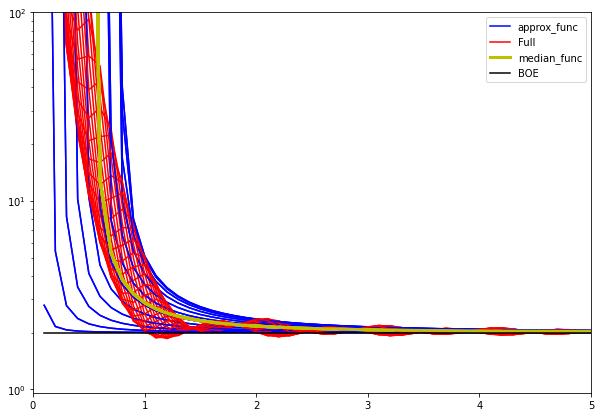

In [3]:
#make plots
plt.rcParams['figure.figsize'] = [10, 7]
Ts=np.linspace(0.1,10,100)
lam0s=np.linspace(0,2*np.pi,24)
first=True
for val in lam0s:
    lab=None
    if first:lab='approx_func'
    plt.plot(Ts,sig2alpCW_approx_func(Ts,val),'b',label=lab)
    if first:lab='Full'
    plt.plot(Ts,sig2alpCW(Ts,val),'r',label=lab)
    if first:lab='median_func'
    plt.plot(Ts,sig2alpCW_Tapprox_func(Ts,val),'y',lw=3,label=lab)
    first=False
plt.plot(Ts,sig2alpCW_approx_coeff+Ts*0,'k',label='BOE')
plt.legend()
plt.yscale('log')
plt.ylim(0,100)
plt.xlim(0,5)

### CW source with constant-velocity constellation

Lastly, as a check, we consider an alternative scenario where $\gamma^i(t)=\gamma_0^i+v^it$ for some constant $v^i$.  We forego the details, but note the result. In this case the motion produces a non-trivial $I_22$. The leading-order result for orbital $\gamma(t)$ is dominated by $I_22$ and by analogy, this would suggest some localization capability, which would be wrong. In this case, though, the each of the $I_{ij}$ terms comes out with functionally identical forms up to commensurate scaling.  As a result the determinant of the (reduced) Fisher matrix vanishes so that covariance element indeed shows no information about location.  This realizes the intuitive result that the incident single should be degenerate with the frequency in this case. 

### Chirping source
The same basic formalism applies to a chirping source, but it is less clear what approximation is appropriate.  A challenge is that we don't a priori know how much of the signal is relevant to the calculation, particularly what fraction of a year.  A few approaches suggest themselves.  

First, we could pursue the direct computation of the $I_{22}$ element which, for the CW case, ultimatly becomes a good estimate.  Two issues seem relevant, the result will generally be angle/time dependent, so some choices must be made there.  More importantly, if the signal is short, then the path seems approximately linear, which would be expected to lead to non-trivial correlation in the Fisher matrix, suggesting caution.

A related approach would compute all three Fisher element, $I_{11}$, $I_{12}$ and $I_{22}$. This would hopefully avoid issues with the degeneracy, but leaves the issue of angle choices.

Another approach is another analytical approach applicable in the limit that the relevant part of the signal occupies only a small part of a year.  We will pursue this case to gain insight, in support, likely of some version of a direct calculation.

For a short-duration observation $T\Omega=\eta\ll1$. Then we can approximate the observatory path as a constant acceleration path.  Here we let
$$
\begin{array}{rcl}
\gamma^x(t)&=&\gamma_0^x-R\Omega \sin(\lambda) t -\frac R2\Omega^2 t^2 \cos(\lambda)\\
\gamma^y(t)&=&\gamma_0^y+R\Omega \cos(\lambda) t -\frac R2\Omega^2 t^2 \sin(\lambda)
\end{array}
$$
For now we leave the direction of acceleration $\lambda$ unspecified.  We ultimately expect a result that is independent of the initial position and velocity, but we include them to start.

As above,the Fisher matrix elements are individually given by
$$
I_{jk}=\int_0^Tdt\left|y(t)\right|^2\omega(t)^2 f_j f_k
$$
where for parameters $(t_0,\ln m,\alpha)$ we this time have
$$
\begin{array}{}
f&=&\left(1,\tau(t),\gamma_\alpha(t)\right),\\
\tau(t)&=&t-t_0-\gamma_0^x+R\Omega\sin(\lambda) t +\frac R2\Omega^2 t^2 \cos(\lambda)\\
\gamma_\alpha(t)&=&\gamma_0^y+R\Omega \cos(\lambda) t-\frac R2\Omega^2 t^2 \sin(\lambda).
\end{array}
$$

As before, we choose the initial position to require $I_{01}=I_{02}$, thus $\overline{\tau}=\overline{\gamma_\alpha}=0$.  Then, using the same notation as above, we have
$$
\begin{array}{rcl}
\frac{\tau}R&=&\left(1+R\Omega\sin(\lambda)\right)\left(x-\overline x\right) +\frac 12R\Omega^2 \cos(\lambda)\left(x^2-\overline{x^2}\right) \\
\frac{\gamma_\alpha}R&=&R\Omega \cos(\lambda)\left(x-\overline x\right)-\frac 12R\Omega^2 \sin(\lambda)\left(x^2-\overline{x^2}\right).
\end{array}
$$

Then for the Fisher elements, we have
$$
\begin{array}{rcl}
\hat I_{11}&=&\left(1+R\Omega\sin(\lambda)\right)^2V_2
  +\left(1+R\Omega\sin(\lambda)\right)R\Omega^2 \cos(\lambda)V_3
  +\frac 14R^2\Omega^4 \cos^2(\lambda)V_4\\
\hat I_{12}&=&R\Omega   \cos(\lambda)\left(1+R\Omega\sin(\lambda)\right)V_2
  -\frac12\left(R\Omega^2 \sin(\lambda)\left(1+R\Omega\sin(\lambda)\right)-R^2\Omega^3 \cos^2(\lambda)\right)V_3\\
 &&\qquad +\frac 14R^2\Omega^4 \cos(\lambda)\sin(\lambda)V_4\\
\hat I_{22}&=&R^2\Omega^2 \cos^2(\lambda)V_2
  -R^2\Omega^3 \cos(\lambda)\sin(\lambda)V_3
  +\frac 14R^2\Omega^4 \sin^2(\lambda)V_4\\
\end{array}
$$ 
where we have defined the only 3 combinations of the integrals appearing as
$$
\begin{array}{rcl}
V_{2}&=&\left(\overline{x^2}-{\overline x}^2\right)\\
V_{3}&=&\left(\overline{x^3}-{\overline x}\,\overline{ x^2}\right)\\
V_{4}&=&\left(\overline{x^4}-{\overline x^2}^2\right).
\end{array}
$$
It we scale time so that $\overline x=0$ as is appropriate to ensure that the Taylor expansion for the orbit is set at the right location, then these expressions simplify neatly.

Keeping terms to leading order in $R$, and computing scaled Fisher matrix $\mathrm{det}=\hat I_{11}\hat I_{22}-{\hat I_{12}}^2$.  We find 
$$
\begin{array}{rcl}
\mathrm{det}&
&\approx&\frac 14R^4\Omega^4 \sin^2(\lambda)\left(V_4V_2-V_3^2\right)
\end{array}
$$

The angle covariance element is then 
$$
\begin{array}{rcl}
\sigma_\alpha^2&\approx&\frac{1}{\rho^2\widehat{\omega}^2R^2}\frac{\hat I_{11}}{\mathrm{det}}\\
&\approx&\frac{4}{\rho^2\widehat{\omega}^2R^6\Omega^4 \sin^2(\lambda)}
\frac{V_2}{V_4V_2-V_3^2}\\
&\gtrapprox&\frac{4}{\rho^2\widehat{\omega}^2R^6\Omega^4}\frac{V_2}{V_4V_2-V_3^2}.\\
\end{array}
$$
The inequality in the last line estimates the optimal case, with $\lambda=\pi/2$. This angle corresponds to alignment where the acceleration is perpendicular to the direction of wavefront propagation. 

The $R$-dependence in the expression is a little unclear because we defined the $V_n$ as functions of $x=t/R$.  If we undo that, writing $\hat V_n=V_n*R^n$, we get quantities independent of $R$ and the angle variance (at optima $\lambda$) becomes
$$
\begin{array}{rcl}
\sigma_{\alpha,\mathrm{opt}}^2
&=&\frac{4}{\rho^2\widehat{\omega}^2R^2\Omega^4}\frac{\hat V_2}{\hat V_4\hat V_2-{\hat V_3}^2}\\
&=&\frac{4}{\rho^2\widehat{\omega}^2a^2}\frac{\hat V_2}{\hat V_4\hat V_2-{\hat V_3}^2}.\\
\end{array}
$$
In the last line we recognise that the magnitude of the acceleration $a=R\Omega^2$ is the only relevant feature from the orbit, as we expected.  In fact, with the $\sin(\lambda)$, it is just the component of accleration perpendicular to the direction of wave propagation. 

We can compare this result with the CW result, by considering the CW case here.  In that case the overbar averages are just ordinary temporal averages.  Assuming an observation of duration $T$, we get
$$
\sigma_{\alpha,\mathrm{CW}}^2=\frac{720}{\rho^2\widehat{\omega}^2R^2\Omega^4T^4}
$$
This is equal to the CW result above when $\Omega T=\sqrt[4]{360}$, so $t\approx0.69$ years

Beyond this example, it is generally clear that our acceleration order approximation for the trajectory becomes inappropriate when $(\delta t\Omega\sim1$, so it is appropriate to truncate the stretch of time included in the integrals.  Limiting that to the range $\overline t-\tilde T<\overline t-\tilde T$ where $\tilde T=\sqrt[4]{360}/(4\pi)\approx 0.347$ years.

We now have two somewhat pratical approaches for chirps, we can compute use the acceleration formula, with time-truncated as discussed, or we can use the full expressions for the Fisher elements and covariance. For the full calculation we set up a optimal orientation at the most significant time $t^*=\overline t$. Thus for the functions which go into the Fisher calculation we have
$$
\begin{array}{rcl}
\tau&=&t+R*\sin\left(\Omega (t-t^*)\right)\\
\gamma_\alpha&=&R\cos\left(\Omega (t-t^*)\right)
\end{array}
$$

We will compare these fromulae and their relevant terms numerically below.


In [4]:
#Formulae for the calculations
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/JohnGBaker/GWI-metrics.git
    src='GWI-metrics/src/'
else:
    src='../src/'
!mkdir -p '../plots/'
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(src)
import constants
import PhenomWaveform_nonspinning as Phenom
import metrics

def get_mtot_eta(source):
    if 'mtot' in source:
        mtot = source.get('mtot')*constants.MSun2s
    else:
        mtot = (source.get('m1') + source.get('m2'))*constants.MSun2s                    
    if 'eta' in source:
        eta = source.get('eta')
    else:
        eta = (source.get('m1')*source.get('m2'))/((source.get('m1')+source.get('m2'))**2)
    return mtot,eta

def compute_chirp(source,model,tstart=1,Npts = 1000,tstop=None):
    #source A dict containing:
    #  eta    Unitless reduced mass
    #  dl     Luminosity distance in kpc
    #model  Observatory model
    #tstart Initial time before coalescence in years
    #Npts   Number of time samples in output
    if 'mtot' in source:
        mtot = source.get('mtot')*constants.MSun2s
    else:
        mtot = (source.get('m1') + source.get('m2'))*constants.MSun2s                    
    if 'eta' in source:
        eta = source.get('eta')
    else:
        eta = (source.get('m1')*source.get('m2'))/((source.get('m1')+source.get('m2'))**2)
    dl = source.get('dl')*constants.kpc2s
    tstart = -tstart*constants.year
    if tstop is None:
        tstop = Phenom.tFromF(0.3*Phenom.getFmerge(mtot,eta),mtot,eta)
    else:
        tstop *=constants.year
    tvals = -np.flip(np.logspace(np.log10(-tstop),np.log10(-tstart),Npts))
    
    # get the corresponding frequency vector
    fvals = Phenom.fFromT(tvals,mtot,eta)
    
    # get the corresponding amplitude 
    hvals = Phenom.binaryAmp(fvals,mtot,eta,dl)
    Sh = metrics.makeSensitivity(fvals, model)
    snri = 4*np.real(hvals*np.conjugate(hvals)/Sh)
    snrt = np.sqrt(np.cumsum(np.diff(fvals)*snri[1:]))
    tvals = tvals[1:]
    #snri=np.concatenate(([0],snri))
    return [tvals,fvals,snri,Sh]

def compute_chirp_John(source,model,tstart=1,Npts = 1000,fstop=None,tstop=None):
    #source A dict containing:
    #  eta    Unitless reduced mass
    #  dl     Luminosity distance in kpc
    #model  Observatory model
    #tstart Initial time before coalescence in years (tstart>tstop or tstart<0)
    #Npts   Number of time samples in output
    #fstop  highest freq (also reference for t=0) [default=fRingdown, but decreasing for EMRI's]
    #tstop  time before fstop (a version of merger) to cut the signal

    mtot,eta=get_mtot_eta(source)
    dl = source.get('dl')*constants.kpc2s
    tstart = -tstart*constants.year
    if fstop is None:
        fring=1.0*Phenom.getFring(mtot,eta)
        fcut_emri=0.3*Phenom.getFmerge(mtot,eta)
        blend=eta/(eta+.05)
        fstop=fring-(1-blend)*(fring-fcut_emri)
        #print('fstop=',fstop)
    else:
        fstop=fstop
    
    fstart=Phenom.fFromT(tstart,mtot,eta)
    
    #print(fstart,'< f <',fstop)
    fvals=np.logspace(np.log10(fstart),np.log10(fstop),Npts)
    tvals=Phenom.t_of_f(fvals,mtot,eta,zero_at_f=fstop)
    
    #implement a stop time
    if tstop is not None:
        tstop=tstop*constants.year
        #we search for the closest cut point in the time series
        ncut=0
        stepfac=4
        step=stepfac**4
        #count=0
        while step>0:
            #print('step=',step)
            while (ncut+step)<len(tvals)-1 and tvals[-(ncut+step)]>=tstop: 
                ncut+=step
                #print('ncut=',ncut)
                #count+=1
            step=step//stepfac
        #print('found ncut=',ncut,'in',count,'  ',tvals[-(ncut+1)],'<=',tstop,tvals[-ncut])
        tvals=tvals[:-ncut]
        fvals=fvals[:-ncut]
    
    # get the corresponding amplitude 
    hvals = Phenom.binaryAmpOnly(fvals,mtot,eta,dl)
    Sh = metrics.makeSensitivity(fvals, model)
    #snri = 4*np.real(hvals*np.conjugate(hvals)/Sh)
    snri = 4*(hvals**2/Sh)
    #snrt = np.sqrt(np.cumsum(np.diff(fvals)*snri[1:]))
    tvals = tvals[1:]
    #snri=np.concatenate(([0],snri))
    return [tvals,fvals,snri,Sh]


def get_rho2om2(chirp):
    tvals,fvals,snri,Sh=chirp
    f=fvals[1:]
    return np.sum(np.diff(fvals)*snri[1:]*f**2)*4*np.pi**2


def get_Vij(chirp,i,j,scale=1):
    tvals,fvals,snri,Sh=chirp
    f=fvals[1:]
    x=tvals/scale
    wt=np.diff(fvals)*snri[1:]*f**2
    wt/=sum(wt)
    x0=sum(wt*x)
    xhalf=0.35*constants.year*scale
    x=x-x0
    zone=np.abs(x)<xhalf
    wt/=sum(wt[zone])
    x0=sum(wt*x)
    x=x-x0
    tiav=np.sum((wt*x**i)[zone])
    tjav=np.sum((wt*x**j)[zone])
    tijav=np.sum((wt*x**(i+j))[zone])
    return tijav-tiav*tjav


def get_sigma2_acc(chirp,model):
    R=model['Rorbit']*constants.AU
    Om=2*np.pi/(model['Torbit']*constants.year)
    accel=R*Om**2
    rho2om2=get_rho2om2(chirp)
    if False:
        V2=get_V2(chirp,rho2om2)
        V3=get_V3(chirp,rho2om2)
        V4=get_V4(chirp,rho2om2)
    else:
        V2=get_Vij(chirp,1,1)
        V3=get_Vij(chirp,1,2)
        V4=get_Vij(chirp,2,2)
    #print("accel,rho2om2,V2Om,V3Om2,V4Om3,V2V4/V3^2",accel,rho2om2,V2*Om,V3*Om**2,V4*Om**3,V2*V4/V3**2)
    return 4/(rho2om2*accel**2)/(V4-V3**2/V2)

def compute_Vs(chirp,model):
    R=model['Rorbit']*constants.AU
    Om=2*np.pi/(model['Torbit']*constants.year)
    accel=R*Om**2
    rho2om2=get_rho2om2(chirp)
    pairs=[(1,1),(1,2),(2,2),(1,4),(2,4),(4,4)]
    res={}
    for i,j in pairs:
        Vij=get_Vij(chirp,i,j)*Om**(i+j)
        name='V'+str(i)+str(j)
        res[name]=Vij
    return res

def get_sigma2(chirp,model):
    tvals,fvals,snri,Sh=chirp
    f=fvals[1:]
    t=tvals
    wt=snri[1:]*(2*np.pi*f)**2*np.diff(fvals)
    fac=sum(wt)
    wt/=fac
    i0=np.argmax(wt)
    t0=t[i0]
    R=model['Rorbit']*constants.AU
    Om=2*np.pi/(model['Torbit']*constants.year)
    tau=t+R*np.sin(Om*t)
    gam=+R*np.cos(Om*t)
    tauav=sum(wt*tau)
    gamav=sum(wt*gam)
    tau-=tauav
    gam-=gamav
    I11=sum(wt*tau**2)
    I12=sum(wt*tau*gam)
    I22=sum(wt*gam**2)
    sig2=1/fac/(I22-I12**2/I11)
    return sig2
    
def get_sigma2_Lconst(shirp,model):
    rho2om2=get_rho2om2(chirp)
    L=model['Lconst']/constants.c
    return 2/rho2om2/(L/2)**2   #I get this from Fisher (quick try)

### Simultaneous separated points localization
For completeness we also consider the Fisher calculation for the case that the wavefront is simultaneously measured at two points then following the logic from before the relevant signals for each detector is
$$
\begin{array}{rcl}
y_1(t,\theta_I,\theta_E)&\approx& \frac{A(t)}{S_1}\exp(i\Phi(\tau_1(t,\theta_E)/m,\theta_I))\\
y_2(t,\theta_I,\theta_E)&\approx& \frac{A(t)}{S_2}\exp(i\Phi(\tau_2(t,\theta_E)/m,\theta_I)).
\end{array}
$$
The specialization for each measurement is shows up only in its PSD (which determines SNR) and in its retarded time (because it is in a different location).  We can now write
$$
\tau_1=t-t_0-\gamma_1\cdot\hat n
$$
and
$$
\gamma_{\alpha,1}=\gamma_1\cdot\hat n_,\alpha.
$$
The difference is that now any detector motion is irrelevant, so we can consider the path vectors $\gamma_1$ to be constant, which simplify things considerably.

The SNR is now
$$
\begin{array}{rcl}
\rho^2&=&\int \left|y_1\right|^2dt+\int\left|y_2\right|^2 dt\\
&=&\rho_1^2+\rho_2^2.
\end{array}
$$
We can then work with separate averages denoted
$$
E_1[f]=\frac1{z_1}\int \left|y_1\right|^2 \omega^2 f dt
$$
where $z_1=\rho^2\widehat\omega^2$ as before to preserve the average of a unit constant as one. The combined average is then
$$
E[f]=\frac1z\left(z_1E_1[f]+z_2E_2[f]\right).
$$
Again we choose the arbitrary common offsetting constant for the $\gamma$ components such that
$$
z_1E_1[\gamma_{\alpha,1}]+z_2E_2[\gamma_{alpha,2}]=0
$$
and similarly for the $\tau$s. If we assume the properties of the measurements are identical except for the path, then $z_1=z_2=z/2$, $E_1[t]=E_2[t]=E[t]$ and $\gamma_{\alpha,1}=-\gamma_{\alpha,1}=\Delta/2$. At least for optimal alignment, with separation perpandicular to the incoming wave vector, then $I_12$ directly vanishes so the that Fisher matrix is trivially invertible, and 
$$
\begin{array}{rcl}
\sigma_\alpha^2&=&\left[\frac z2 \left(\frac\Delta2\right)^2 +\frac z2 \left(\frac\Delta2\right)^2\right]^{-1}\\
&=&\frac{4}{\rho^2\widehat\omega^2\Delta^2}.
\end{array}
$$

That assumes that $\rho^2$ represents the combined SNR, as would certainly make sense for within-constellation triangulation.  For two constellations with each with an SNR of $\rho^2_\mathrm{each}=\rho^/2$ we could write
$$
\sigma_\alpha^2=\frac{2}{\rho_{\mathrm{each}}^2\widehat\omega^2\Delta^2}.
$$

In [5]:
#Compute and make plots
import sources
import concepts
source=sources.MBHB61.copy()
#source=sources.MBHB81.copy()
#source=sources.MBHB31.copy()
#source=sources.SOBH.copy()
model=concepts.LISACBE.copy()

chirp=compute_chirp(source,model)
sigma2=get_sigma2_acc(chirp,model)
sig2=get_sigma2(chirp,model)
print('sigma2_acc',sigma2)
print('sigma2',sig2)
print('sigma2_acc/sigma2',sigma2/sig2)
if False:
    Vs=compute_Vs(chirp,model)
    for k in Vs:print(k,Vs[k])    
    print('V11V22-V12**2',Vs['V11']*Vs['V22']-Vs['V12']**2)
    print('(V11V24-V12V14)/12 ',(Vs['V11']*Vs['V24']-Vs['V12']*Vs['V14'])/12)
    print('(V11V44-V14**2)/144',(Vs['V11']*Vs['V44']-Vs['V14']**2)/144)

sigma2_acc 0.26461074231727716
sigma2 0.28083829846730435
sigma2_acc/sigma2 0.9422174388657449


Text(0, 0.5, '$\\sigma_\\alpha$')

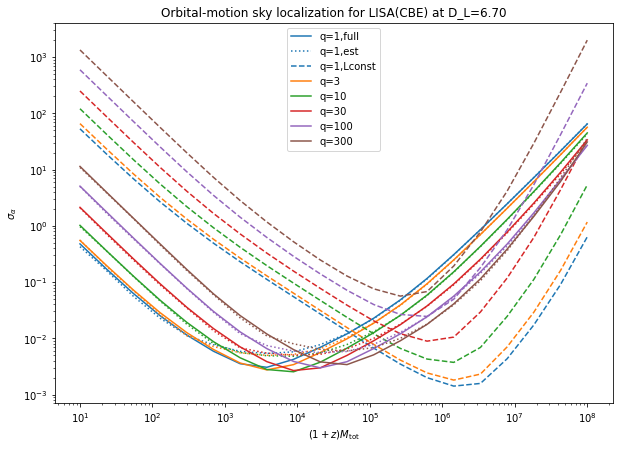

In [6]:
Ms=np.logspace(1,8,20)
qs=[1,3,10,30,100,300]
model=concepts.LISACBE.copy()
source=sources.MBHB31.copy()
tstart=1
firstq=True
tcut=None#/365.25
for q in qs:
    sig_acc=[]
    sig=[]
    sig_L=[]
    for M in Ms:
        M1=M*q/(1+q)
        M2=M/(1+q)
        source['m1']=M1
        source['m2']=M2
        chirp=compute_chirp_John(source,model,tstart=tstart,tstop=tcut)
        sig_acc.append(np.sqrt(get_sigma2_acc(chirp,model)))
        sig.append(np.sqrt(get_sigma2(chirp,model)))
        sig_L.append(np.sqrt(get_sigma2_Lconst(chirp,model)))
    lab='q='+str(q)
    if firstq:lab+=',full'
    p=plt.loglog(Ms,sig,ls='solid',label=lab)
    lab=None
    if firstq:lab='q='+str(q)+',est'
    plt.loglog(Ms,sig_acc,ls='dotted',c=p[-1].get_color(),label=lab)
    if firstq:lab='q='+str(q)+',Lconst'
    plt.loglog(Ms,sig_L,ls='dashed',c=p[-1].get_color(),label=lab)
    firstq=False
plt.legend()
plt.title(r'Orbital-motion sky localization for '+model['label']+' at D_L=%.2f'%(source['dl']/1e6))
plt.xlabel(r'$(1+z)M_\mathrm{tot}$')
plt.ylabel(r'$\sigma_\alpha$')

We see that the accerleration approximation generally agrees quite well with the more complete calculations, except for the near optimally sensitive masses, where it estimates inferior resolution by a factor of up to about 3.  This agreement provides support for both calculations.  Since it is logically simpler to compute the  more complete version, we adopt that as the standard to implement.  Note that the near peak estiamtes may be significantly affected by the galactic confuction noise.

The plot also shows our estimate for the constellation-based localization. For low masses, this is negligible, but it is dominant for LISA's prime sensitivity band with redshifted masses around $10^6 M_odot$.  It was critical to include the merger in the calculation to see the benefit of the constellation-based localization.

NB. An earlier version of this plot was missing a factor of $2\pi$. This estimate indicates better resolution.

mtot = 4.7e-05, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot = 0.00011, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot = 0.00026, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot = 0.0006, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot = 0.0014, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot = 0.0033, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot = 0.0077, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot = 0.018, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot = 0.042, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot = 0.098, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot = 0.23, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot = 0.53, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot = 1.2, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot = 2.9, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot = 6.8, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot =  16, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot =  37, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot =  87, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
mtot = 2e+02, eta = 0.25, ds = 6.9e+17, T = -1.3e+

Text(0, 0.5, '$\\sigma_\\alpha$')

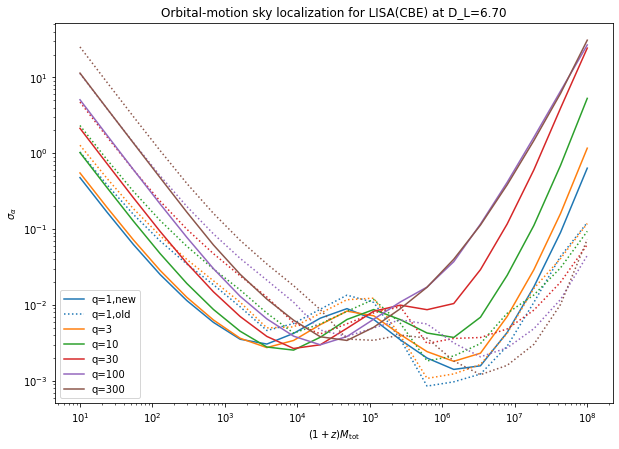

In [7]:
Ms=np.logspace(1,8,20)
qs=[1,3,10,30,100,300]
model=concepts.LISACBE.copy()
source=sources.MBHB31.copy()
tstart=1
firstq=True
tcut=None#/365.25
for q in qs:
    sig_nb=[]
    sig_old=[]
    for M in Ms:
        M1=M*q/(1+q)
        M2=M/(1+q)
        source['m1']=M1
        source['m2']=M2
        #First the notebook version
        chirp=compute_chirp_John(source,model,tstart=tstart,tstop=tcut)
        #sig=np.sqrt(min([get_sigma2(chirp,model),get_sigma2_Lconst(chirp,model)])) #minimum
        sig=(get_sigma2(chirp,model)**-1+get_sigma2_Lconst(chirp,model)**-1)**-0.5 #quadrature sum
        sig_nb.append(sig)
        #Now the old implementation
        obs = metrics.getSourceSnr(source,model,-4.0*constants.year)
        obs = metrics.getResolution(obs)
        sig_old.append(obs['Angular Resolution'])
    lab='q='+str(q)
    if firstq:lab+=',new'
    p=plt.loglog(Ms,sig_nb,ls='solid',label=lab)
    lab=None
    if firstq:lab='q='+str(q)+',old'
    plt.loglog(Ms,sig_old,ls='dotted',c=p[-1].get_color(),label=lab)
    firstq=False
plt.legend()
plt.title(r'Orbital-motion sky localization for '+model['label']+' at D_L=%.2f'%(source['dl']/1e6))
plt.xlabel(r'$(1+z)M_\mathrm{tot}$')
plt.ylabel(r'$\sigma_\alpha$')

The plot above compares results from the old implmentation with the calculations of the current notebook. At low masses where the orbital motion dominates, the new calculation yeilds results of 2-4 times better resolution than before.  Most of our attention, for the new calculations wen to that region and the resulting differences are only moderate.  We may expect greater differences where the signals are truncated before merger (comparison TBD).

For large masses, the new results are more significantly different, with the new results generally yielding less sensitivity, by factors of 1.5 to 1000, the worst case being the largest masses and mass ratios.  This part of the result comes from the constellation-scale based localization. Our new result was nominally not very different than the old result, though we changed the waveform code, and changed the way we compute the reference frequency as well as adjusting overall scale factor. More investigation is warranted.

### New time-frequency relation

To support including mergers in the chirp calculations, we had to work on the Phenom waveform code.  Previously the code relied on PN $t(f)$ and $f(t)$ relations which did not extend into the merger, and thus would require neglecting the merger in this resolution calculation.

In the new version we exploit an alternative definition of $t(f)$ derived directly from the phase of a chirping signal's Fourier transform 
$$
t(f)=\frac1{2\pi}\frac d{df}\tilde\Phi(f)
$$
where $\tilde\Phi(f)$ is the Fourier domain phase function (already available as a differentiable function in the Phenom model).  

Applying this new model required some changes in the structure of the chirp code because the grid must be specified in $f$ with $t$ derived, rather than the other way around.  We have no $f(t)$ function through merger.  At the same time we made and applied an alternative version of the Phenom "Amp" code which really only computes the amplitude (all we really need).  This avoids a lot of unnecessary exponential evaluations and should be faster.

The first plot below shows the comparsion of time functions for various chirps, with the original results in black.  The main difference is that the new version extends through the merger.  There are some differences at the low-f end for cases with very many cycles.  I believe these show inconsistencies between the Phenom waveform model and the orignal PN expressions for $t(f)$.  We expect the mew version is more consistent with the Phenom model.  More investigation of this may be needed.

The second plot below compares the SNR calculations for the old and new codes.  We see perfect agreement where the domains overlie, but the old version missed important parts of the signal. It is a bit surprising that the highest masses do not roll over.  Apparently the Phenom amplitude function only falls off as $1/f^2$ which is slower than the low-f sensitivity slope.

Text(0, 0.5, '$t+10$')

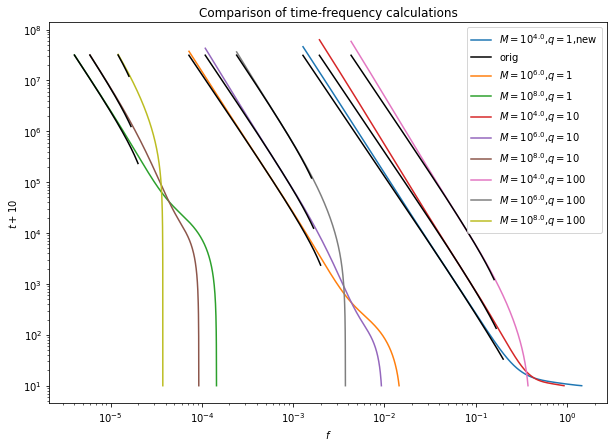

In [8]:
Ms=[1e4,1e6,1e8]
qs=[1,10,100]
model=concepts.LISACBE.copy()
source=sources.MBHB31.copy()
tstart=1
firstq=True
tcut=None#/365.25
toff=10
for q in qs:
    sig_acc=[]
    sig=[]
    sig_L=[]
    for M in Ms:
        M1=M*q/(1+q)
        M2=M/(1+q)
        source['m1']=M1
        source['m2']=M2
        #New version
        tvals,fvals,snri,Sh=compute_chirp_John(source,model,tstart=tstart,tstop=tcut)
        lab='$M=10^{'+str(np.log10(M))+'}$,$q='+str(q)+'$'
        if firstq:lab+=',new'
        p=plt.loglog(fvals[1:],toff-tvals,label=lab)
        #Original version
        tvals,fvals,snri,Sh=compute_chirp(source,model,tstart=tstart,tstop=tcut)
        lab=None
        if firstq:lab='orig'
        plt.loglog(fvals[1:],toff-tvals,label=lab,c='k')#c=p[-1].get_color())
        firstq=False
plt.legend()
plt.title(r'Comparison of time-frequency calculations')
plt.xlabel(r'$f$')
plt.ylabel(r'$t+'+str(toff)+'$')

Text(0, 0.5, '$\\frac{d}{df}$SNR')

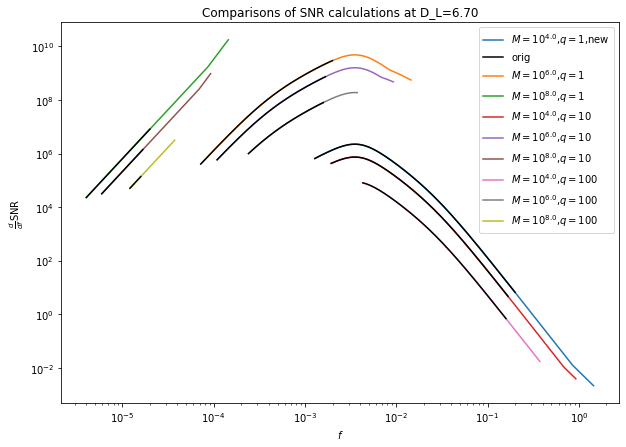

In [9]:
Ms=[1e4,1e6,1e8]
qs=[1,10,100]
model=concepts.LISACBE.copy()
source=sources.MBHB31.copy()
tstart=1
firstq=True
tcut=None#/365.25
toff=10
for q in qs:
    sig_acc=[]
    sig=[]
    sig_L=[]
    for M in Ms:
        M1=M*q/(1+q)
        M2=M/(1+q)
        source['m1']=M1
        source['m2']=M2
        #New version
        tvals,fvals,snri,Sh=compute_chirp_John(source,model,tstart=tstart,tstop=tcut)
        lab='$M=10^{'+str(np.log10(M))+'}$,$q='+str(q)+'$'
        if firstq:lab+=',new'
        p=plt.loglog(fvals[1:],snri[1:],label=lab)
        #Original version
        tvals,fvals,snri,Sh=compute_chirp(source,model,tstart=tstart,tstop=tcut)
        lab=None
        if firstq:lab='orig'
        plt.loglog(fvals[1:],snri[1:],label=lab,c='k')#c=p[-1].get_color())
        firstq=False
plt.legend()
plt.title(r'Comparisons of SNR calculations at D_L=%.2f'%(source['dl']/1e6))
plt.xlabel(r'$f$')
plt.ylabel(r'$\frac{d}{df}$SNR')

### Testing the new code as implemented 

We have implemented the new calculation in metrics.py.  The main function is  

`getSNRandSkyResolution(source,model,Nsamp=0,...)`

which computes the SNR and sky-resolution at the same time for any source type and returns an  `observation dict`. If `Nsamp`$>0$ then it will iteratively compute results as a function "of t" showing how the results depend on the unfolding of the obseravation over time. 

First we test 

/Users/jgbaker/Projects/FGRST/GWImager/GWI-metrics/Notebooks/../src/PhenomWaveform_nonspinning.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ThetaNEG8vals = Thetavals**(-0.125)
/Users/jgbaker/Projects/FGRST/GWImager/GWI-metrics/Notebooks/../src/PhenomWaveform_nonspinning.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ThetaNEG8vals = Thetavals**(-0.125)
/Users/jgbaker/Projects/FGRST/GWImager/GWI-metrics/Notebooks/../src/PhenomWaveform_nonspinning.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ThetaNEG8vals = Thetavals**(-0.125)


nan
mtot = 4.7e-05, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.00011, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.00026, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.0006, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.0014, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.0033, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.0077, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.018, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.042, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.098, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.23, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.53, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 1.2, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 2.9, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 6.8, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot =  16, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot =  37, eta = 0.25, ds = 6.9e+17, T = -1.3e+08
nan
mtot =  87, eta = 0.25, ds = 

/Users/jgbaker/Projects/FGRST/GWImager/GWI-metrics/Notebooks/../src/PhenomWaveform_nonspinning.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ThetaNEG8vals = Thetavals**(-0.125)
/Users/jgbaker/Projects/FGRST/GWImager/GWI-metrics/Notebooks/../src/PhenomWaveform_nonspinning.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ThetaNEG8vals = Thetavals**(-0.125)
/Users/jgbaker/Projects/FGRST/GWImager/GWI-metrics/Notebooks/../src/PhenomWaveform_nonspinning.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ThetaNEG8vals = Thetavals**(-0.125)


nan
mtot = 0.0033, eta = 0.0033, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.0077, eta = 0.0033, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.018, eta = 0.0033, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.042, eta = 0.0033, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.098, eta = 0.0033, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.23, eta = 0.0033, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 0.53, eta = 0.0033, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 1.2, eta = 0.0033, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 2.9, eta = 0.0033, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 6.8, eta = 0.0033, ds = 6.9e+17, T = -1.3e+08
nan
mtot =  16, eta = 0.0033, ds = 6.9e+17, T = -1.3e+08
nan
mtot =  37, eta = 0.0033, ds = 6.9e+17, T = -1.3e+08
nan
mtot =  87, eta = 0.0033, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 2e+02, eta = 0.0033, ds = 6.9e+17, T = -1.3e+08
nan
mtot = 4.7e+02, eta = 0.0033, ds = 6.9e+17, T = -1.3e+08


Text(0, 0.5, '$\\sigma_\\alpha$')

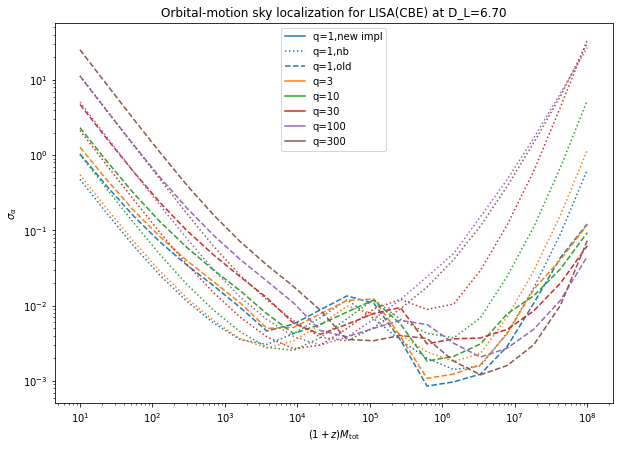

In [10]:
import importlib
import metrics
importlib.reload(metrics)
Ms=np.logspace(1,8,20)
qs=[1,3,10,30,100,300]
model=concepts.LISACBE.copy()
source=sources.MBHB31.copy()
tstart=1
firstq=True
tcut=None#/365.25
for q in qs:
    sig_nb=[]
    sig_imp=[]
    sig_old=[]
    for M in Ms:
        M1=M*q/(1+q)
        M2=M/(1+q)
        source['m1']=M1
        source['m2']=M2
        #First the notebook version
        chirp=compute_chirp_John(source,model,tstart=tstart,tstop=tcut)
        sig=np.sqrt(min([get_sigma2(chirp,model),get_sigma2_Lconst(chirp,model)])) #minimum
        #sig=(get_sigma2(chirp,model)**-1+get_sigma2_Lconst(chirp,model)**-1)**-0.5 #quadrature sum
        sig_nb.append(sig)
        #Next the new implementation
        obs=metrics.getSNRandSkyResolution(source,model,Tmax=4)
        sig=obs['Angular Resolution']
        print(sig)
        sig_imp.append(sig)
        #Now the old implementation
        obs = metrics.getSourceSnr(source,model,-4.0*constants.year)
        obs = metrics.getResolution(obs)
        sig_old.append(obs['Angular Resolution'])
    lab='q='+str(q)
    if firstq:lab+=',new impl'
    p=plt.loglog(Ms,sig_imp,ls='solid',label=lab)
    lab=None
    if firstq:lab='q='+str(q)+',nb'
    plt.loglog(Ms,sig_nb,ls='dotted',c=p[-1].get_color(),label=lab)
    if firstq:lab='q='+str(q)+',old'
    plt.loglog(Ms,sig_old,ls='dashed',c=p[-1].get_color(),label=lab)
    firstq=False
plt.legend()
plt.title(r'Orbital-motion sky localization for '+model['label']+' at D_L=%.2f'%(source['dl']/1e6))
plt.xlabel(r'$(1+z)M_\mathrm{tot}$')
plt.ylabel(r'$\sigma_\alpha$')

In [11]:
obs=metrics.getSNRandSkyResolution(source,model,Tmax=4)
print(obs)

{'source': {'type': 'chirp', 'label': '$10^{3}\\,M_{\\odot}+10^{3}\\,M_{\\odot}\\:@\\:z=1$', 'm1': 99667774.08637874, 'm2': 332225.9136212625, 'dl': 6700000.0}, 'model': {'label': 'LISA(CBE)', 'sqSacc_ASD': [[3e-15, 1.2e-18], [0, -1]], 'sqSoms_func': <function OMS_Noise_PSD at 0x7fcae22e6550>, 'P_Tx': 1.5, 'lambdaOMS': 1064, 'D_Tx': 0.3, 'Responsivity': 0.7, 'OMS_other_ASD': 1e-11, 'Lconst': 2500000000.0, 'Dsep': 0, 'Rorbit': 1.0, 'Torbit': 1.0, 'Nindep': 2, 'SciDuration': 4}, 'f': 2.6090521335429243e-05, 't': -5849646.807140514, 'Angular Resolution': nan, 'SNR': nan}


/Users/jgbaker/Projects/FGRST/GWImager/GWI-metrics/Notebooks/../src/PhenomWaveform_nonspinning.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ThetaNEG8vals = Thetavals**(-0.125)
